# Purpose
1. Understand textrank: an application of pagerank algorithm on text

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/Ankush-Chander/graph-notebooks/blob/main/notebooks/textrank_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://www.kaggle.com/code/latebloomer/pagerank-in-nlp"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# spaCy
spaCy is a library for **advanced Natural Language Processing in Python and Cython**. It's built on the very latest research, and was designed from day one to be used in real products.

spaCy comes with **pretrained pipelines and currently supports tokenization and training for 70+ languages**. It features state-of-the-art speed and neural network models for **tagging, parsing, named entity recognition, text classification** and more, multi-task learning with pretrained transformers like BERT, as well as a production-ready training system and easy model packaging, deployment and workflow management. spaCy is commercial open-source software, released under the MIT license.

## installation

In [1]:
# ! pip install spacy
# ! python -m spacy download en_core_web_sm

## Usage

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import spacy
from icecream import ic 
nlp = spacy.load("en_core_web_sm")


text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."
doc = nlp(text)

| Feature | Description |
| --- | --- |
| Linguistic annotations | Insights into a text's grammatical structure, including word types and how the words are related to each other. |
| Sentence boundary detection | Finding and segmenting individual sentences. |
| Tokenization | The process of segmenting text into words, punctuation, and so on. |
| Part-of-speech tags and dependencies | spaCy can parse and tag a given Doc, making predictions of which tag or label most likely applies in this context. |
| Named Entities | spaCy can recognize various types of named entities in a document, such as person, country, product, or book title. |
| Word vectors and similarity | Similarity is determined by comparing word vectors or "word embeddings", multi-dimensional meaning representations of a word. |

In [19]:
for sent in doc.sents:
    ic(sent.start, sent.end, sent.text)

ic| sent.start: 0
    sent.end: 13
    sent.text: ('Compatibility of systems of linear constraints over the set of natural '
                'numbers.')
ic| sent.start: 13
    sent.end: 33
    sent.text: ('Criteria of compatibility of a system of linear Diophantine equations, '
                'strict inequations, and nonstrict inequations are considered.')
ic| sent.start: 33
    sent.end: 61
    sent.text: ('Upper bounds for components of a minimal set of solutions and algorithms of '
                'construction of minimal generating sets of solutions for all types of '
                'systems are given.')
ic| sent.start: 61
    sent.end: 91
    sent.text: ('These criteria and the corresponding algorithms for constructing a minimal '
                'supporting set of solutions can be used in solving all the considered types '
                'systems and systems of mixed types.')


In [20]:
# tokenization and linguistic properties
for token in doc[:5]:
    ic(token.idx, token.text, token.lemma_,  token.pos_, token.tag_, token.is_alpha, token.is_stop)

ic| token.idx: 0
    token.text: 'Compatibility'
    token.lemma_: 'compatibility'
    token.pos_: 'NOUN'
    token.tag_: 'NN'
    token.is_alpha: True
    token.is_stop: False
ic| token.idx: 14
    token.text: 'of'
    token.lemma_: 'of'
    token.pos_: 'ADP'
    token.tag_: 'IN'
    token.is_alpha: True
    token.is_stop: True
ic| token.idx: 17
    token.text: 'systems'
    token.lemma_: 'system'
    token.pos_: 'NOUN'
    token.tag_: 'NNS'
    token.is_alpha: True
    token.is_stop: False
ic| token.idx: 25
    token.text: 'of'
    token.lemma_: 'of'
    token.pos_: 'ADP'
    token.tag_: 'IN'
    token.is_alpha: True
    token.is_stop: True
ic| token.idx: 28
    token.text: 'linear'
    token.lemma_: 'linear'
    token.pos_: 'ADJ'
    token.tag_: 'JJ'
    token.is_alpha: True
    token.is_stop: False


In [5]:
# noun phrase detection
for nc in doc.noun_chunks:
    ic(nc.start, nc.end, nc.text)

ic| nc.start: 0, nc.end: 1, nc.text: 'Compatibility'
ic| nc.start: 2, nc.end: 3, nc.text: 'systems'
ic| nc.start: 4, nc.end: 6, nc.text: 'linear constraints'
ic| nc.start: 7, nc.end: 9, nc.text: 'the set'
ic| nc.start: 10, nc.end: 12, nc.text: 'natural numbers'
ic| nc.start: 13, nc.end: 14, nc.text: 'Criteria'
ic| nc.start: 15, nc.end: 16, nc.text: 'compatibility'
ic| nc.start: 17, nc.end: 19, nc.text: 'a system'
ic| nc.start: 20, nc.end: 23, nc.text: 'linear Diophantine equations'
ic| nc.start: 24, nc.end: 26, nc.text: 'strict inequations'
ic| nc.start: 28, nc.end: 30, nc.text: 'nonstrict inequations'
ic| nc.start: 36, nc.end: 37, nc.text: 'components'
ic| nc.start: 38, nc.end: 41, nc.text: 'a minimal set'
ic| nc.start: 42, nc.end: 43, nc.text: 'solutions'
ic| nc.start: 44, nc.end: 45, nc.text: 'algorithms'
ic| nc.start: 46, nc.end: 47, nc.text: 'construction'
ic| nc.start: 48, nc.end: 51, nc.text: 'minimal generating sets'
ic| nc.start: 52, nc.end: 53, nc.text: 'solutions'
ic| nc.sta

# Textrank algorithm
TextRank is a graph based unsupervised technique for keyphrase extraction and extractive summarization.  
To enable the application of graph-based ranking algorithms to natural language texts, we have to
build a graph that represents the text, and interconnects words or other text entities with meaningful relations.  

Reference: [Mihalcea, Rada, and Paul Tarau. "Textrank: Bringing order into text." Proceedings of the 2004 conference on empirical methods in natural language processing. 2004.](https://aclanthology.org/W04-3252.pdf)

## Create a textgraph
1. **Identify text units that best define the task at hand, and add them as vertices in the graph.**  
   In our case we will consider (lemma, pos_) as nodes. For eg: `('compatibility', 'NOUN')` will be our node.
2. **Identify relations that connect such text units, and use these relations to draw edges between vertices in the graph. Edges can be directed or undirected, weighted or unweighted.**  
We will consider two nodes to be connected if they lie in a window of 3 within the same sentence
3. **Iterate the graph-based ranking algorithm until convergence.**   
   We use `nx.pagerank` to calculate the pagerank scores of each node in textgraph
5. **Sort vertices based on their final score. Use the values attached to each vertex for ranking/selection decisions.**


In [21]:

def increment_edge (graph, node0, node1):
    if graph.has_edge(node0, node1):
        graph[node0][node1]["weight"] += 1.0
    else:
        graph.add_edge(node0, node1, weight=1.0)

In [7]:
def link_sentence(doc, sent, lemma_graph, seen_lemma):
    visited_tokens = []
    visited_nodes = []

    for token in sent:
        # token = doc[i]
        # filter tokens based on allowed pos tags only
        if token.pos_ not in POS_KEPT:
            continue
        
        key = (token.lemma_, token.pos_)

        if key not in seen_lemma:
            seen_lemma[key] = set([token.i])
        else:
            seen_lemma[key].add(token.i)

        node_id = list(seen_lemma.keys()).index(key)

        if not node_id in lemma_graph:
            lemma_graph.add_node(node_id)

        for prev_token in range(len(visited_tokens) - 1, -1, -1):
            
            if token.i - visited_tokens[prev_token] <= 3:
                print(f"add edge [{token.lemma_}]<===>[{doc[visited_tokens[prev_token]].lemma_}]")
                increment_edge(lemma_graph, node_id, visited_nodes[prev_token])
            else:
                break

        visited_tokens.append(token.i)
        visited_nodes.append(node_id)


In [22]:
POS_KEPT = ["ADJ", "NOUN", "PROPN", "VERB"]

lemma_graph = nx.Graph()
seen_lemma = {}
for sent in doc.sents:
    link_sentence(doc, sent, lemma_graph, seen_lemma)


print(f"lemma_graph created with {len(lemma_graph.nodes)} nodes and {len(lemma_graph.edges)} edges.")


add edge [system]<===>[compatibility]
add edge [linear]<===>[system]
add edge [constraint]<===>[linear]
add edge [constraint]<===>[system]
add edge [set]<===>[constraint]
add edge [natural]<===>[set]
add edge [number]<===>[natural]
add edge [number]<===>[set]
add edge [compatibility]<===>[criterion]
add edge [system]<===>[compatibility]
add edge [linear]<===>[system]
add edge [Diophantine]<===>[linear]
add edge [Diophantine]<===>[system]
add edge [equation]<===>[Diophantine]
add edge [equation]<===>[linear]
add edge [strict]<===>[equation]
add edge [strict]<===>[Diophantine]
add edge [inequation]<===>[strict]
add edge [inequation]<===>[equation]
add edge [nonstrict]<===>[inequation]
add edge [inequation]<===>[nonstrict]
add edge [consider]<===>[inequation]
add edge [consider]<===>[nonstrict]
add edge [bound]<===>[upper]
add edge [component]<===>[bound]
add edge [component]<===>[upper]
add edge [minimal]<===>[component]
add edge [set]<===>[minimal]
add edge [solution]<===>[set]
add edge

In [23]:
id2text = {}
keys = list(seen_lemma.keys())

for i in range(len(seen_lemma)):
    id2text[i] = keys[i][0].lower()

## Calculate pagerank

In [24]:
# calculate pagerank
lemma_scores = nx.pagerank(lemma_graph)
lemma_scores = {node: round(score,3) for node, score in lemma_scores.items()}
# print sorted scores
{id2text[key]: val for key, val in sorted(lemma_scores.items(), key=lambda x: x[1], reverse=True)}

{'system': 0.097,
 'set': 0.075,
 'minimal': 0.063,
 'solution': 0.062,
 'type': 0.048,
 'inequation': 0.04,
 'consider': 0.039,
 'linear': 0.037,
 'equation': 0.032,
 'component': 0.032,
 'algorithm': 0.032,
 'construct': 0.032,
 'diophantine': 0.031,
 'generating': 0.029,
 'support': 0.029,
 'corresponding': 0.027,
 'compatibility': 0.025,
 'strict': 0.025,
 'nonstrict': 0.025,
 'upper': 0.024,
 'bound': 0.024,
 'construction': 0.024,
 'constraint': 0.023,
 'criterion': 0.02,
 'solve': 0.02,
 'natural': 0.019,
 'number': 0.019,
 'use': 0.019,
 'mixed': 0.017,
 'give': 0.011}

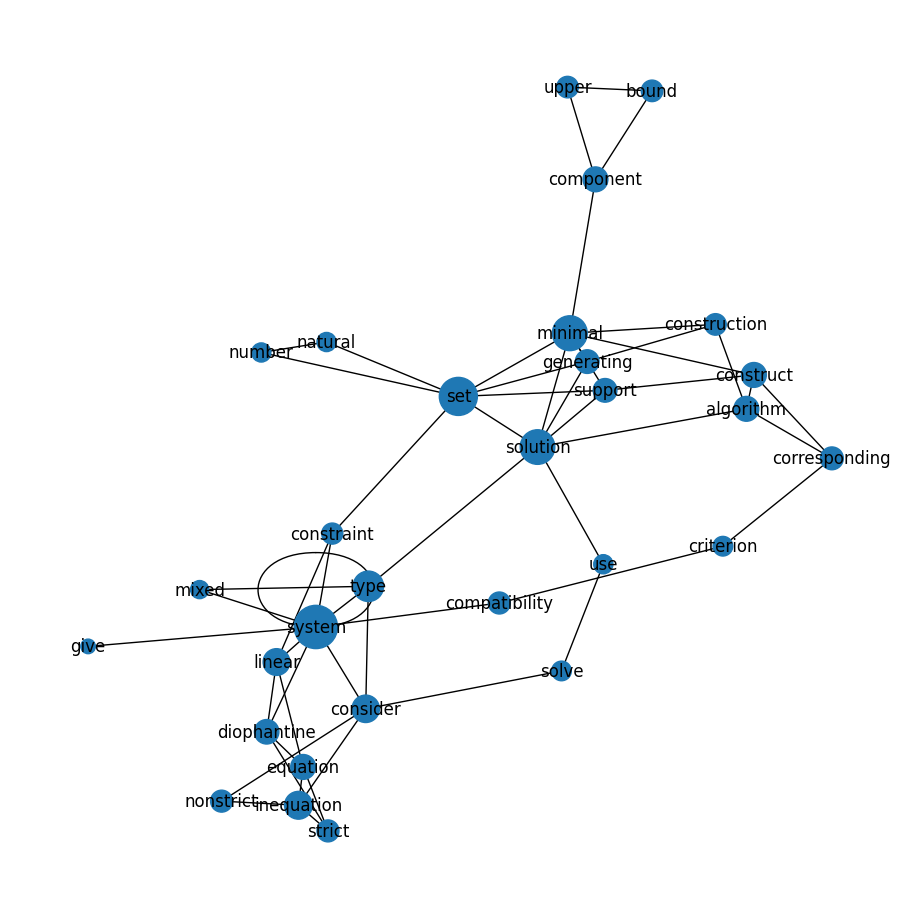

In [25]:
# draw graph with size of nodes as per pagerank score
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(lemma_graph)
nx.draw(lemma_graph, pos=pos, with_labels=False, font_weight="bold", node_size=[v * 10000 for v in lemma_scores.values()])
node_labels = nx.draw_networkx_labels(lemma_graph, pos, id2text)


## Keyphrase extraction
To calculate phrase rank:
1. we take sum of ranks of constituent lemmas.
$$
rank\_sum = \sum_{i=1}^{n} {rank_i}
$$
2. use root mean square (RMS) to normalize the contributions of all the tokens.  
$$
    \text{phrase\_rank} = \sqrt{\frac{rank\_sum}{\text{chunk\_len} + \text{non\_lemma}}}
$$
4. Discount it based on tokens that are not present in lemma graph 
$$
    \text{non\_lemma\_discount} = \frac{\text{chunk\_len}}{\text{chunk\_len} + (2.0 * non\_lemma) + 1.0} 
$$
$$
    \text{phrase\_rank} = \text{phrase\_rank} * \text{non\_lemma\_discount}
$$

In [26]:
import math

ranks = lemma_scores

def collect_phrases (chunk, phrases, counts):
    chunk_len = chunk.end - chunk.start
    sq_sum_rank = 0.0
    non_lemma = 0
    compound_key = set([])

    for token in chunk:
        key = (token.lemma_, token.pos_)

        if key in seen_lemma:
            node_id = list(seen_lemma.keys()).index(key)
            rank = ranks[node_id]
            sq_sum_rank += rank
            compound_key.add(key)
        else:
            non_lemma += 1

    # although the noun chunking is greedy, we discount the ranks using a
    # point estimate based on the number of non-lemma tokens within a phrase
    non_lemma_discount = chunk_len / (chunk_len + (2.0 * non_lemma) + 1.0)

    # use root mean square (RMS) to normalize the contributions of all the tokens
    phrase_rank = math.sqrt(sq_sum_rank / (chunk_len + non_lemma))
    phrase_rank *= non_lemma_discount

    # remove spurious punctuation
    phrase = chunk.text.lower().replace("'", "")

    # create a unique key for the the phrase based on its lemma components
    compound_key = tuple(sorted(list(compound_key)))

    if not compound_key in phrases:
        phrases[compound_key] = set([ (phrase, phrase_rank) ])
        counts[compound_key] = 1
    else:
        phrases[compound_key].add( (phrase, phrase_rank) )
        counts[compound_key] += 1

    ic(phrase_rank, chunk.text, chunk_len, counts[compound_key])


In [27]:
phrases = {}
counts = {}

for chunk in doc.noun_chunks:
    collect_phrases(chunk, phrases, counts)


ic| phrase_rank: 0.07905694150420949
    chunk.text: 'Compatibility'
    chunk_len: 1
    counts[compound_key]: 1
ic| phrase_rank: 0.15572411502397437
    chunk.text: 'systems'
    chunk_len: 1
    counts[compound_key]: 1
ic| phrase_rank: 0.11547005383792515
    chunk.text: 'linear constraints'
    chunk_len: 2
    counts[compound_key]: 1
ic| phrase_rank: 0.0632455532033676
    chunk.text: 'the set'
    chunk_len: 2
    counts[compound_key]: 1
ic| phrase_rank: 0.09189365834726815
    chunk.text: 'natural numbers'
    chunk_len: 2
    counts[compound_key]: 1
ic| phrase_rank: 0.07071067811865475
    chunk.text: 'Criteria'
    chunk_len: 1
    counts[compound_key]: 1
ic| phrase_rank: 0.07905694150420949
    chunk.text: 'compatibility'
    chunk_len: 1
    counts[compound_key]: 2
ic| phrase_rank: 0.07192588778272628
    chunk.text: 'a system'
    chunk_len: 2
    counts[compound_key]: 2
ic| phrase_rank: 0.13693063937629152
    chunk.text: 'linear Diophantine equations'
    chunk_len: 3
   

## Variants of textrank

### Base pytextrank

In [28]:
import spacy
import pytextrank

# example text
text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(text)

# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:10]:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)


minimal generating sets
0.17883828024583154 1
[minimal generating sets]
linear Diophantine equations
0.14015779770966044 1
[linear Diophantine equations]
systems
0.14013985092698114 3
[systems, systems, systems]
linear constraints
0.13067254265906908 1
[linear constraints]
solutions
0.12438844296057915 3
[solutions, solutions, solutions]
strict inequations
0.1211664859928741 1
[strict inequations]
mixed types
0.11428706937912782 1
[mixed types]
nonstrict inequations
0.11335859909814999 1
[nonstrict inequations]
linear
0.10947214006758256 1
[linear]
a minimal supporting set
0.10560436051518673 1
[a minimal supporting set]


### Biased textrank
is a graph-based content extraction method inspired by the popular TextRank algorithm that ranks text spans according to their importance for language processing tasks and according to their relevance to an input 'focus'. Biased TextRank enables focused content extraction for text by modifying the random restarts in the execution of TextRank.

References: [kazemi-etal-2020-biased](https://derwen.ai/docs/ptr/biblio/#kazemi-etal-2020-biased)

In [15]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("biasedtextrank");

text = """Chelsea 'opted against' signing Salomon Rondón on deadline day.
Chelsea reportedly opted against signing Salomón Rondón on deadline day despite their long search for a new centre forward. With Olivier Giroud expected to leave, the Blues targeted Edinson Cavani, Dries Mertens and Moussa Dembele – only to end up with none of them. According to Telegraph Sport, Dalian Yifang offered Rondón to Chelsea only for them to prefer keeping Giroud at the club. Manchester United were also linked with the Venezuela international before agreeing a deal for Shanghai Shenhua striker Odion Ighalo. Manager Frank Lampard made no secret of his transfer window frustration, hinting that to secure top four football he ‘needed’ signings. Their draw against Leicester on Saturday means they have won just four of the last 13 Premier League matches.
"""

doc = nlp(text)

focus = "Leicester"
doc._.textrank.change_focus(focus,bias=10.0,  default_bias=0.0)

for phrase in doc._.phrases[:10]:
    ic(phrase)


ic| phrase: Phrase(text='Leicester',
                   chunks=[Leicester, Leicester],
                   count=2,
                   rank=0.2434939744809635)
ic| phrase: Phrase(text='Saturday',
                   chunks=[Saturday, Saturday],
                   count=2,
                   rank=0.17975133976641308)
ic| phrase: Phrase(text='the last 13 Premier League matches',
                   chunks=[the last 13 Premier League matches],
                   count=1,
                   rank=0.09945686053992162)
ic| phrase: Phrase(text='Their draw', chunks=[Their draw], count=1, rank=0.0703202174184535)
ic| phrase: Phrase(text='Salomon Rondón',
                   chunks=[Salomon Rondón, Salomon Rondón],
                   count=2,
                   rank=0.0015734433251935586)
ic| phrase: Phrase(text='Salomón Rondón',
                   chunks=[Salomón Rondón, Salomón Rondón],
                   count=2,
                   rank=0.0015734433251935586)
ic| phrase: Phrase(text='Rondón', chun

### PositionRank 
is an unsupervised model for keyphrase extraction from scholarly documents that incorporates information from all positions of a word’s occurrences into a biased PageRank.
Specifically, we propose to assign a higher probability to a word found on the 2nd position as compared with a word found on the 50th position in the same document.
The weight of each candidate word is equal to its inverse position in the document. If the same word appears multiple times in the target document, then we sum all its position weights.

In [29]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("positionrank");
text = "Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."
doc = nlp(text)

for phrase in doc._.phrases[:10]:
    ic(phrase) 

ic| phrase: Phrase(text='systems',
                   chunks=[systems, systems, systems],
                   count=3,
                   rank=0.16642586280288038)
ic| phrase: Phrase(text='minimal generating sets',
                   chunks=[minimal generating sets],
                   count=1,
                   rank=0.16393128373491028)
ic| phrase: Phrase(text='linear constraints',
                   chunks=[linear constraints],
                   count=1,
                   rank=0.16191704494138187)
ic| phrase: Phrase(text='linear Diophantine equations',
                   chunks=[linear Diophantine equations],
                   count=1,
                   rank=0.16185891278233844)
ic| phrase: Phrase(text='linear', chunks=[linear], count=1, rank=0.13711769105865249)
ic| phrase: Phrase(text='Compatibility',
                   chunks=[Compatibility],
                   count=1,
                   rank=0.1364563727283554)
ic| phrase: Phrase(text='compatibility',
                   chun

### TopicRank
is a graph-based keyphrase extraction method that relies on a topical representation of the document. Candidate keyphrases are clustered into topics and used as vertices in a complete graph. A graph-based ranking model is applied to assign a significance score to each topic. Keyphrases are then generated by selecting a candidate from each of the topranked topics.

Reference: [bougouin-etal-2013-topicrank](https://derwen.ai/docs/ptr/biblio/#bougouin-etal-2013-topicrank)

In [17]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("topicrank");

text = """Chelsea 'opted against' signing Salomon Rondón on deadline day.
Chelsea reportedly opted against signing Salomón Rondón on deadline day despite their long search for a new centre forward. With Olivier Giroud expected to leave, the Blues targeted Edinson Cavani, Dries Mertens and Moussa Dembele – only to end up with none of them. According to Telegraph Sport, Dalian Yifang offered Rondón to Chelsea only for them to prefer keeping Giroud at the club. Manchester United were also linked with the Venezuela international before agreeing a deal for Shanghai Shenhua striker Odion Ighalo. Manager Frank Lampard made no secret of his transfer window frustration, hinting that to secure top four football he ‘needed’ signings. Their draw against Leicester on Saturday means they have won just four of the last 13 Premier League matches.
"""
doc = nlp(text)

for phrase in doc._.phrases[:10]:
    ic(phrase.text)


ic| phrase.text: 'Salomon Rondón'
ic| phrase.text: 'Chelsea'
ic| phrase.text: 'Olivier Giroud'
ic| phrase.text: 'deadline day'
ic| phrase.text: 'Leicester'
ic| phrase.text: 'club'
ic| phrase.text: 'Edinson Cavani'
ic| phrase.text: 'draw'
ic| phrase.text: 'Manchester United'
ic| phrase.text: 'Dalian Yifang'


# References
1. [Spacy-101](https://spacy.io/usage/spacy-101)
2. [TextRank: Bringing Order into Texts](https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf)
3. [pytextrank- github](https://github.com/DerwenAI/pytextrank)
4. [pytextrank - tutorial](https://derwen.ai/docs/ptr/explain_algo/)
5. [PyTextRank: A Python Implementation of NLP Text Rank Algorithm by Paco Nathan](https://www.youtube.com/watch?v=ZwlPsdRDtMI)